In [1]:
import pandas as pd
import requests
from shapely import wkt
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt
import contextily as cx
import geopandas as gpd
import numpy as np
from tqdm import tqdm
import os

In [2]:
import rtree

In [3]:
gdf = gpd.read_file("work/data/stoej.json")
gdf_edges = gpd.read_file("work/data/edges.json")

In [4]:
def find_top_matches(polygon, lines_df, buffer_dist=0.01, max_matches=3):
    buffered_poly = polygon.buffer(buffer_dist) 

    # Potential matches within the buffered area
    potential_matches_idx = list(lines_index.intersection(buffered_poly.bounds))
    potential_matches = lines_df.iloc[potential_matches_idx]

    if not potential_matches.empty:
        potential_matches['intersect_area'] = potential_matches.apply(lambda row: row['geometry'].intersection(polygon).area, axis=1)
        return potential_matches.sort_values('intersect_area', ascending=False).head(max_matches)
    else:
        return None  


# Build Spatial Index
lines_index = rtree.index.Index()
for idx, row in gdf_edges.iterrows():
    lines_index.insert(idx, row['geometry'].bounds)

results = []

for index, row in gdf.head(100).iterrows():  # Test with the first x rows
    polygon = row['geometry']
    top_matches = find_top_matches(polygon, gdf_edges)

    if top_matches is not None:
        top_matches['polygon_index'] = index 
        isov1_value = row['isov1']
        top_matches.loc[:, 'isov1'] = isov1_value 
        results.append(top_matches)

if results:
    final_gdf = gpd.GeoDataFrame(pd.concat(results, ignore_index=True),crs="EPSG:2643")
    print(final_gdf)    


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

                              id access   betweenness junction   length  \
0        (16495091, 16495097, 0)   None  0.000000e+00     None   78.617   
1    (1119390260, 1119390369, 0)   None  6.044110e-09     None   31.981   
2    (5444056769, 5443065706, 0)   None  0.000000e+00     None  233.221   
3      (247960595, 247960628, 0)   None  2.465997e-06     None  243.261   
4    (2427130830, 1418529786, 0)   None  5.802345e-07     None   60.232   
..                           ...    ...           ...      ...      ...   
295  (4881488069, 4881488068, 0)   None  1.511027e-07     None   38.591   
296  (3395315259, 3395315249, 0)   None  1.511027e-07     None    8.289   
297  (1626867217, 1626867223, 0)   None  1.511027e-07     None   42.855   
298  (1052300896, 1557314496, 0)   None  1.536715e-06     None   65.837   
299  (1573985937, 9782463293, 0)   None  1.394678e-06     None   34.525   

     oneway                                           geometry  \
0     False  LINESTRING (12.63302

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_3844/4088037691.py:33: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  final_gdf = gpd.GeoDataFrame(pd.concat(results, ignore_index=True),crs="EPSG:2643")


In [5]:
final_gdf.isov1.value_counts()

65    204
58     63
53     27
63      3
68      3
Name: isov1, dtype: int64

In [6]:
final_gdf.explore()

In [19]:
a = gdf[gdf.id == 1193].explode()

/tmp/ipykernel_1270/427605492.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  a = gdf[gdf.id == 1193].explode()


In [23]:
a.iloc[:1].explore()

In [8]:
gdf.centroid.head(5).iloc[:5].explore()

/tmp/ipykernel_863/402436407.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.head(5).iloc[:5].explore()


In [9]:
gdf.geometry.head(5).iloc[:10].explore()

In [11]:
# gdf['centroid'] = gdf.centroid
# gdf['corresponding_linestring'] = None
gdf['road_name'] = None

gdf.centroid

/tmp/ipykernel_863/1080552465.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid


0       POINT (12.64328 55.64629)
1       POINT (12.52699 55.61965)
2       POINT (12.54661 55.69706)
3       POINT (12.55471 55.71438)
4       POINT (12.61600 55.65195)
                  ...            
3608    POINT (12.55583 55.66619)
3609    POINT (12.57966 55.66512)
3610    POINT (12.53551 55.70470)
3611    POINT (12.61123 55.66539)
3612    POINT (12.48070 55.71054)
Length: 3613, dtype: geometry

In [13]:
gdf.head(5)

,kategori,isov1,isov2,noise_in,org,id,geometry,centroid,corresponding_linestring,road_name
0,Lnight,65,65,3,Københavns Kommune,1,"POLYGON Z ((12.64372 55.64572 0.00000, 12.6435...",POINT (12.64328 55.64629),None,None
1,Lnight,65,65,3,Københavns Kommune,2,"POLYGON Z ((12.52696 55.61951 0.00000, 12.5269...",POINT (12.52699 55.61965),None,None
2,Lden,53,58,5,Københavns Kommune,1193,"POLYGON Z ((12.54718 55.69747 0.00000, 12.5471...",POINT (12.54661 55.69706),None,None
3,Lden,58,63,4,Københavns Kommune,3314,"POLYGON Z ((12.55604 55.71756 0.00000, 12.5560...",POINT (12.55471 55.71438),None,None
4,Lden,58,63,4,Københavns Kommune,3315,"POLYGON Z ((12.61713 55.65536 0.00000, 12.6171...",POINT (12.61600 55.65195),None,None


In [12]:
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm


for index, centroid in tqdm(gdf.centroid.iteritems(), total=len(gdf), desc="Mapping Centroids to Linestrings"):
    for index_edge, linestring in gdf_edges.iterrows():
        if centroid.intersects(linestring['geometry']):
            gdf.at[index, 'corresponding_linestring'] = index_edge
            gdf["road_name"] = gdf_edges.id



/tmp/ipykernel_863/3677098327.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in tqdm(gdf.centroid.iteritems(), total=len(gdf), desc="Mapping Centroids to Linestrings"):
Mapping Centroids to Linestrings:   0%|                                              | 7/3613 [01:02<8:53:53,  8.88s/it]


KeyboardInterrupt: 

In [ ]:
gdf_edges["geometry"].head(5)

0    LINESTRING (12.56291 55.67398, 12.56300 55.673...
1    LINESTRING (12.56291 55.67398, 12.56335 55.674...
2    LINESTRING (12.56151 55.66310, 12.56155 55.66307)
3    LINESTRING (12.56151 55.66310, 12.56161 55.66314)
4    LINESTRING (12.57193 55.66824, 12.57203 55.66817)
Name: geometry, dtype: geometry

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/tmp/ipykernel_1766/2182768693.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid
/tmp/ipykernel_1766/2182768693.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  scatter = ax.scatter(gdf.centroid.x, gdf.centroid.y, c=gdf['isov1'], cmap='viridis')
/tmp/ipykernel_1766/2182768693.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  scatter = ax.scat

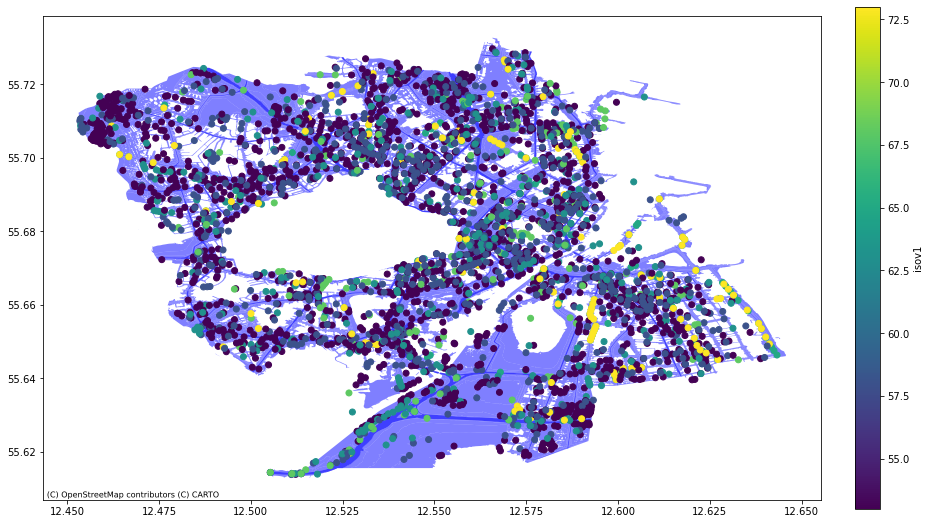

In [13]:
ax = gdf.plot(figsize=(15, 15), color='blue', alpha=0.5)

# Add basemap
cx.add_basemap(ax, crs="EPSG:2643", source=cx.providers.CartoDB.Voyager)

# Extract centroids
gdf['centroid'] = gdf.centroid

# Add gradient color based on the "iso1" column
scatter = ax.scatter(gdf.centroid.x, gdf.centroid.y, c=gdf['isov1'], cmap='viridis')

# Add colorbar
plt.colorbar(scatter, ax=ax, label='isov1', fraction=0.03, pad=0.04)

plt.show()

### Getting the data

In [2]:
file_read = False
try:
    gdf = gpd.read_file("work/data/noise_data.geojson")
    print("file read succesfully!")
    file_read = True
except NameError:
    print("data not found. using taxpayer money now to get data :)")
    api_url = 'https://admin.opendata.dk/api/3/action/datastore_search_sql'

    query = 'SELECT * FROM "d5f8f59f-78f1-4775-bc04-63992b9387fb" WHERE "KOMMUNE"=\'101\' OR "KOMMUNE"=\'147\''

    def fetch_data(sql_query):
        params = {'sql': sql_query}
        response = requests.get(api_url, params=params)

        if response.status_code == 200:
            data = response.json()['result']['records']
            return pd.DataFrame(data)
        else:
            print("Error:", response.status_code)
            return None

    data_101 = fetch_data(query)

    df = pd.DataFrame(data_101)

if not file_read:
    order = [
        "DATAEJER",
        "VEJBESTYRER",
        "VEJNR",
        "VEJDEL",
        "VEJNAVN",
        "KILOMETER",
        "METER",
        "LOKATION",
        "KOMMUNE",
        "AAR",
        "AADT",
        "TIMEANTAL07_19_MOTORKTJ",
        "TIMEANTAL19_22_MOTORKTJ",
        "TIMEANTAL22_07_MOTORKTJ",
        "GNSHAST07_19_MOTORKTJ",
        "GNSHAST19_22_MOTORKTJ",
        "GNSHAST22_07_MOTORKTJ",
        "TIMEANTAL07_19_0_580",
        "TIMEANTAL19_22_0_580",
        "TIMEANTAL22_07_0_580",
        "GNSHAST07_19_0_580",
        "GNSHAST19_22_0_580",
        "GNSHAST22_07_0_580",
        "TIMEANTAL07_19_580_1250",
        "TIMEANTAL19_22_580_1250",
        "TIMEANTAL22_07_580_1250",
        "GNSHAST07_19_580_1250",
        "GNSHAST19_22_580_1250",
        "GNSHAST22_07_580_1250",
        "TIMEANTAL07_19_O_1250",
        "TIMEANTAL19_22_O_1250",
        "TIMEANTAL22_07_O_1250",
        "GNSHAST07_19_O_1250",
        "GNSHAST19_22_O_1250",
        "GNSHAST22_07_O_1250",
        "KOOR_SDO"
    ]

    df = df.reindex(columns=order)

    gdf = gpd.GeoDataFrame(df,crs="EPSG:32632",geometry=df['KOOR_SDO'].apply(wkt.loads))
    gdf.set_geometry("geometry")
    gdf.drop(columns = ["KOOR_SDO"], inplace=True)

    gdf.to_file('noise_data.geojson', driver='GeoJSON')  


file read succesfully!


In [16]:
import pandas as pd
import numpy as np

def calculate_road_noise(row):
    # Simplistic placeholder values - refine based on CRTN 
    noise_per_car = 1.0 
    noise_per_medium_vehicle = 1.5 
    noise_per_large_vehicle = 3 

    # Adjustments - modify these based on CRTN formulas
    speed_factor = 30 * np.log10(row['Average_Speed'] / 1) 
    distance_factor = -20 * np.log10(row['Distance_To_Receiver'] / 1) 

    # Estimated noise contributions
    car_noise = noise_per_car * row['Small_Vehicles']  
    medium_vehicle_noise = noise_per_medium_vehicle * row['Medium_Vehicles'] 
    large_vehicle_noise = noise_per_large_vehicle * row['Large_Vehicles']

    total_noise = car_noise + medium_vehicle_noise + large_vehicle_noise + distance_factor 
    return total_noise

# ------------------ Main Calculation ------------------

df  = gdf

# Assuming these exist from your loading process:
df['Small_Vehicles'] = df[['TIMEANTAL07_19_0_580', 'TIMEANTAL19_22_0_580', 'TIMEANTAL22_07_0_580']].sum(axis=1)
df['Medium_Vehicles'] = df[['TIMEANTAL07_19_580_1250', 'TIMEANTAL19_22_580_1250', 'TIMEANTAL22_07_580_1250']].sum(axis=1)
df['Large_Vehicles'] = df[['TIMEANTAL07_19_O_1250', 'TIMEANTAL19_22_O_1250', 'TIMEANTAL22_07_O_1250']].sum(axis=1)

# (Repeat similar calculations for all vehicle categories and time periods)

# Average speed
df['Average_Speed'] = df[['GNSHAST07_19_MOTORKTJ', 'GNSHAST19_22_MOTORKTJ', 'GNSHAST22_07_MOTORKTJ']].mean(axis=1)  # Modify for other vehicle categories

# Add a column for distance (make sure units match CRTN)
df['Distance_To_Receiver'] = 20  # Example distance - you'll need to provide this data

# Calculate noise
df['Noise_Level'] = df.apply(calculate_road_noise, axis=1)

print(df)


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

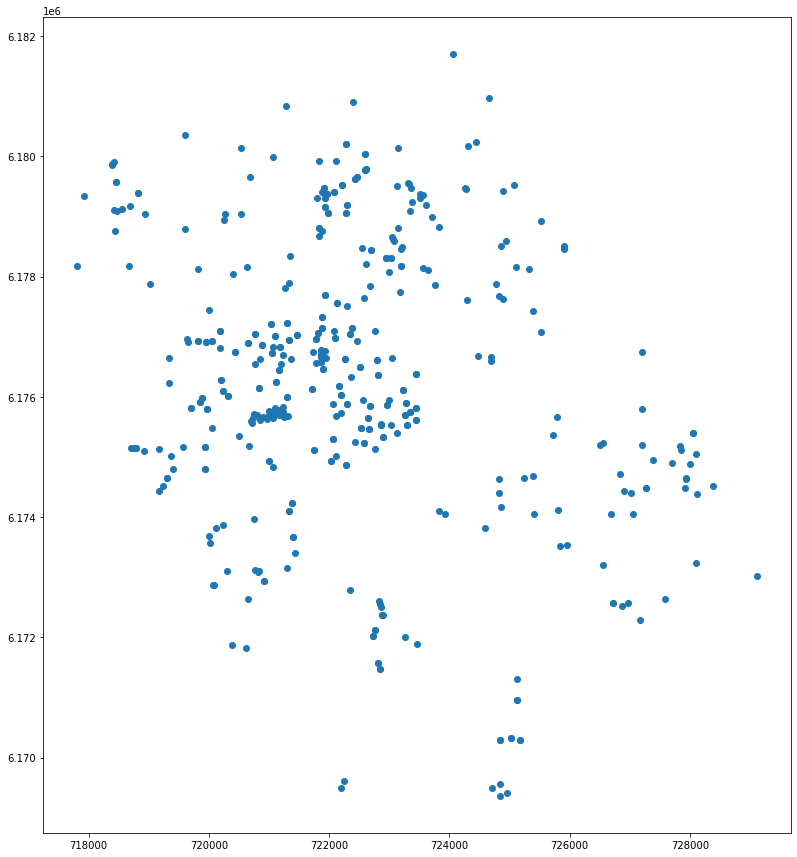

In [20]:
ax = gdf.plot(figsize = (15,15))



cx.add_basemap(
    ax, 
    crs="EPSG:32632",
    source=cx.providers.CartoDB.Voyager
)

plt.show()

In [4]:
df["Noise_Level"] /= 10000

In [7]:
list(df.columns)

['DATAEJER',
 'VEJBESTYRER',
 'VEJNR',
 'VEJDEL',
 'VEJNAVN',
 'KILOMETER',
 'METER',
 'LOKATION',
 'KOMMUNE',
 'AAR',
 'AADT',
 'TIMEANTAL07_19_MOTORKTJ',
 'TIMEANTAL19_22_MOTORKTJ',
 'TIMEANTAL22_07_MOTORKTJ',
 'GNSHAST07_19_MOTORKTJ',
 'GNSHAST19_22_MOTORKTJ',
 'GNSHAST22_07_MOTORKTJ',
 'TIMEANTAL07_19_0_580',
 'TIMEANTAL19_22_0_580',
 'TIMEANTAL22_07_0_580',
 'GNSHAST07_19_0_580',
 'GNSHAST19_22_0_580',
 'GNSHAST22_07_0_580',
 'TIMEANTAL07_19_580_1250',
 'TIMEANTAL19_22_580_1250',
 'TIMEANTAL22_07_580_1250',
 'GNSHAST07_19_580_1250',
 'GNSHAST19_22_580_1250',
 'GNSHAST22_07_580_1250',
 'TIMEANTAL07_19_O_1250',
 'TIMEANTAL19_22_O_1250',
 'TIMEANTAL22_07_O_1250',
 'GNSHAST07_19_O_1250',
 'GNSHAST19_22_O_1250',
 'GNSHAST22_07_O_1250',
 'geometry',
 'Small_Vehicles',
 'Medium_Vehicles',
 'Large_Vehicles',
 'Average_Speed',
 'Distance_To_Receiver',
 'Noise_Level']

In [6]:
df[["VEJNAVN", "LOKATION", "AADT", "Geo", ]].explore()

In [19]:
df[["VEJNAVN","VEJNR","LOKATION","decibel","geometry"]].explore(color = "red")

### Calculating noise levels based on the observed data

In [10]:
#list cols without truncating
pd.options.display.max_columns = None

for i in list(df.columns):
    print(i)

DATAEJER
VEJBESTYRER
VEJNR
VEJDEL
VEJNAVN
KILOMETER
METER
LOKATION
KOMMUNE
AAR
AADT
TIMEANTAL07_19_MOTORKTJ
TIMEANTAL19_22_MOTORKTJ
TIMEANTAL22_07_MOTORKTJ
GNSHAST07_19_MOTORKTJ
GNSHAST19_22_MOTORKTJ
GNSHAST22_07_MOTORKTJ
TIMEANTAL07_19_0_580
TIMEANTAL19_22_0_580
TIMEANTAL22_07_0_580
GNSHAST07_19_0_580
GNSHAST19_22_0_580
GNSHAST22_07_0_580
TIMEANTAL07_19_580_1250
TIMEANTAL19_22_580_1250
TIMEANTAL22_07_580_1250
GNSHAST07_19_580_1250
GNSHAST19_22_580_1250
GNSHAST22_07_580_1250
TIMEANTAL07_19_O_1250
TIMEANTAL19_22_O_1250
TIMEANTAL22_07_O_1250
GNSHAST07_19_O_1250
GNSHAST19_22_O_1250
GNSHAST22_07_O_1250
geometry
Small_Vehicles
Medium_Vehicles
Large_Vehicles
Average_Speed
Distance_To_Receiver
Noise_Level
